연습문제 1-2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(2024)

dim1 = np.random.randint(1,5)
dim2 = np.random.randint(1,5)

vector_1 = np.random.rand(dim1)
vector_2 = np.random.rand(dim2)

def norm(n, v):
    sum = 0
    for i in range(n):
        sum += v[i]**2
    return math.sqrt(sum)

print(norm(dim1, vector_1), np.linalg.norm(vector_1))
print(norm(dim2, vector_2), np.linalg.norm(vector_2))

#같다

ModuleNotFoundError: No module named 'numpy'

연습문제 1-5

In [11]:
vector_r = np.array([[1,2,3,4]])
vector_c = np.zeros((vector_r.shape[1], vector_r.shape[0]))

for i in range(vector_r.shape[0]):
    for j in range(vector_r.shape[1]):
        vector_c[j,i] = vector_r[i,j]
print(vector_c)

[[1.]
 [2.]
 [3.]
 [4.]]


연습문제 1-6

In [13]:
dim3 = np.random.randint(1,5)
vector_3 = np.random.rand(dim3)

a = norm(dim3, vector_3)**2
b = np.dot(vector_3,vector_3)

print(a,b)

0.2245297506384294 0.2245297506384294


연습문제 1-7

In [17]:
dim4 = np.random.randint(1,5)
dim5 = np.random.randint(1,5)

vector_4 = np.random.rand(dim1)
vector_5 = np.random.rand(dim2)

if np.sum(vector_4*vector_5) == np.sum(vector_5*vector_4):
    print(True)

True


연습문제 1-8

In [26]:
a = np.random.randint(1,11)

t = np.random.rand(a)
r = np.random.rand(a)

B = r*(np.sum(t*r)/np.sum(r*r))
bug = r*(np.sum(t*r)/np.sum(t*t))

print(B, bug)

[0.06312915 0.35230186 0.8045527 ] [0.06756407 0.37705158 0.86107368]


연습문제 2-1

In [40]:
l1 = 1
l2 = 2
l3 = 3


v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

s = [ l1,l2,l3 ]
v = [ v1,v2,v3 ]

y = np.zeros(len(v1))

for i in range(len(v1)):
    y += s[i]*v[i]
y

array([-1., 14., -1.])

연습문제 2-2

In [43]:
s2 = [ l1,l2,l3,4 ]


y2 = np.zeros(len(v1))

for i in range(len(v1)):
    y2 += s2[i]*v[i]
y2

array([-1., 14., -1.])

연습문제 2-3

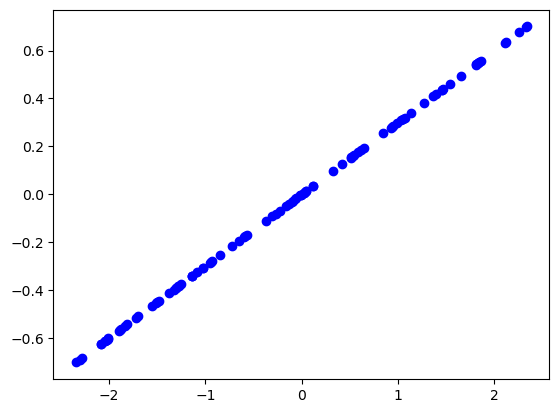

In [52]:
plt.figure()

v = np.array([1,3])
s = np.random.uniform(-4,4,size=100)

for s in s:
    p = A*s
    plt.plot(p[0],p[1],'bo')

plt.show()


In [64]:
xlim = [-4,4]
v1 = np.array([ 3,5,1 ])
v2 = np.array([ 0,2,2 ])

s1 = np.random.uniform(low=-4,high=4,size=(100,2))


points = np.zeros((100,3))
for i in range(len(s1)):

  # define this point as a random weighted combination of the two vectors
  points[i,:] = v1*s1[i,0] + v2*s1[i,1]


# draw the dots in the plane
fig = go.Figure( data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], 
                                    mode='markers', marker=dict(size=3,color='blue') )])

# fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

연습문제 3-1

In [76]:
def corrandcossim(a,b):
    a_m = a-np.mean(a)
    b_m = b-np.mean(b)
    num = np.dot(a_m, b_m)
    den = np.linalg.norm(a_m)*np.linalg.norm(b_m)
    corr = num/den
    num1 = np.dot(a,b)
    den1 = np.linalg.norm(a)*np.linalg.norm(b)
    cossim = num1/den1
    return corr,cossim


a = np.random.randn(10)
b = np.random.randn(10)

corr1 = corrandcossim(a,b)[0]
print(corr1,np.corrcoef(a,b)[0,1])

0.1701044526160167 0.1701044526160167


In [77]:
a = np.random.randn(15)+ 10
b = np.random.randn(15)

a_nm = a - np.mean(a)
b_nm = b - np.mean(b)


print( '평균 중심화 x: ', np.round(corrandcossim(a,b),4) )
print( '평균 중심화 o: ',np.round(corrandcossim(a_nm,b_nm),4) )

평균 중심화 x:  [-0.1932  0.096 ]
평균 중심화 o:  [-0.1932 -0.1932]


연습문제 3-2

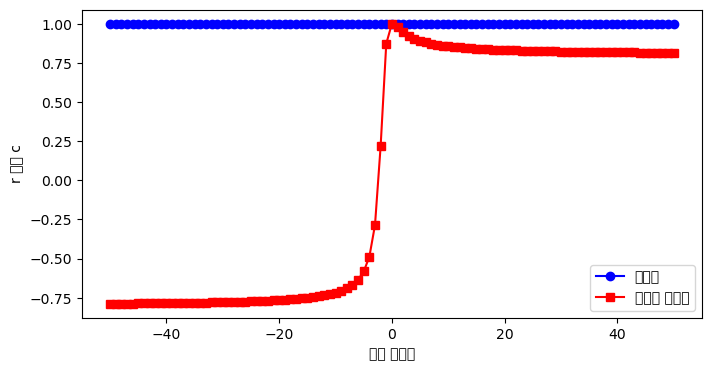

In [79]:
a = np.arange(4,dtype=int)
offsets = np.arange(-50,51)

results = np.zeros((len(offsets),2))

for i in range(len(offsets)):
    results[i,:] = corrandcossim(a,a+offsets[i])


plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('b')
h[0].set_marker('o')
h[1].set_color('r')
h[1].set_marker('s')

plt.xlabel('평균 오프셋')
plt.ylabel('r 또는 c')
plt.legend(['피어슨','코사인 유사도'])
plt.show()

연습문제 3-6

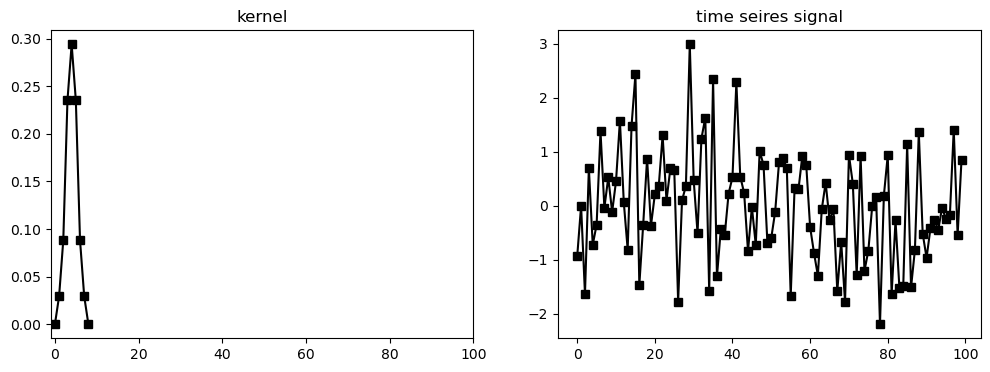

In [87]:
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel) #합이 1이 되도록 조정

Nkernel = len(kernel)
halfNker = Nkernel//2


Nsignal = 100
timeseries = np.random.randn(Nsignal)


_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('time seires signal')

plt.show()

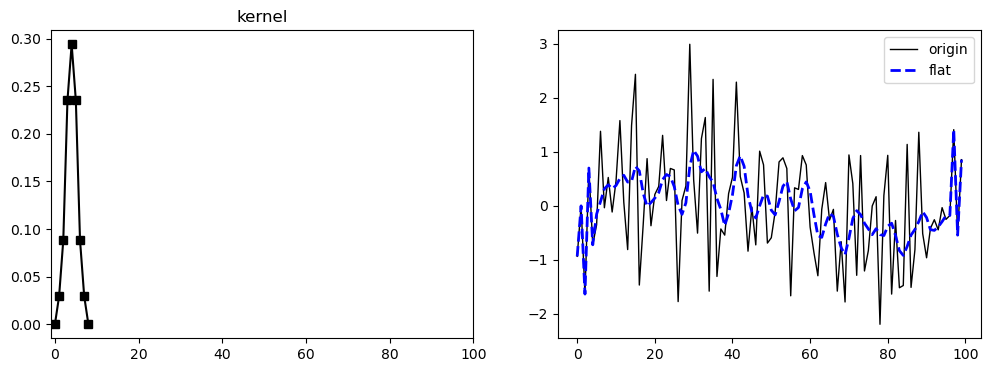

In [88]:
filtsig = timeseries.copy()

for t in range(halfNker+1,Nsignal-halfNker):
  filtsig[t] = np.dot(kernel,timeseries[t-halfNker-1:t+halfNker])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='origin',linewidth=1)
axs[1].plot(filtsig,'--',color='b',label='flat',linewidth=2)
axs[1].legend()

plt.show()

연습문제 3-7

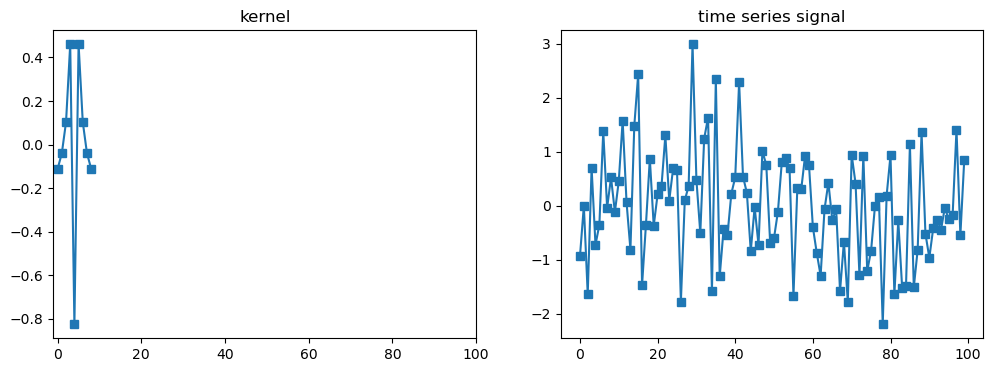

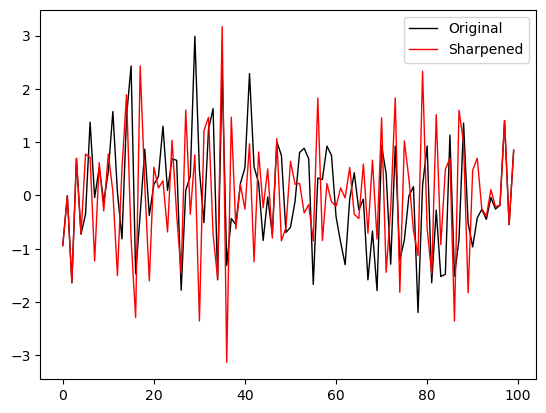

In [92]:
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0]) #중앙을 -1로 바꿈
kernel /= np.sum(kernel) #평균화 과정1
kernel -= np.mean(kernel) #평균화 과정2

_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('time series signal')
plt.show()



filtsig2 = timeseries.copy()
for t in range(halfNker+1,Nsignal-halfNker):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfNker-1:t+halfNker])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color='r',label='Sharpened',linewidth=1)
plt.legend()
plt.show()

연습문제 3-8

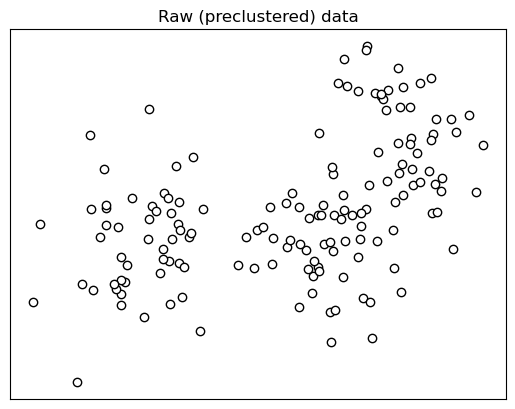

In [94]:
n = 50

blur = 1

A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

a = [ A[0]+np.random.randn(n)*blur , A[1]+np.random.randn(n)*blur ]
b = [ B[0]+np.random.randn(n)*blur , B[1]+np.random.randn(n)*blur ]
c = [ C[0]+np.random.randn(n)*blur , C[1]+np.random.randn(n)*blur ]

data = np.transpose( np.concatenate((a,b,c),axis=1) )


plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

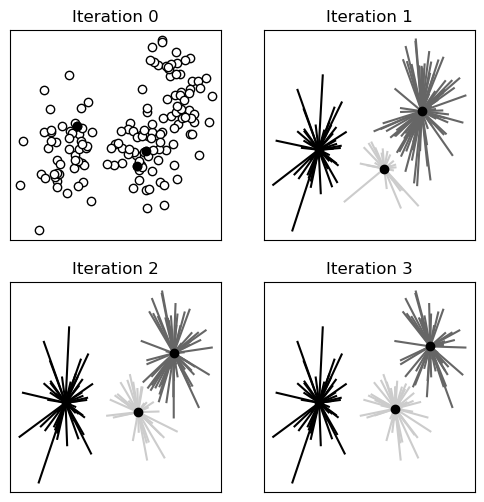

In [96]:
#초기 중심 개수 지정
k = 3 # extract three clusters

# 임의로 중심값 지정 
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# 초기 랜덤 군집들 나타내기
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

for iter in range(3): #3번 반복
    
  # step 1: 거리 측정
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: 최소 거리를 기준으로 그룹화
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: 중심 계산
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  for i in range(len(data)):
    axs[iter+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iter+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iter+1].set_title(f'Iteration {iter+1}')
  axs[iter+1].set_xticks([])
  axs[iter+1].set_yticks([])


plt.show()

연습문제 4-2

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


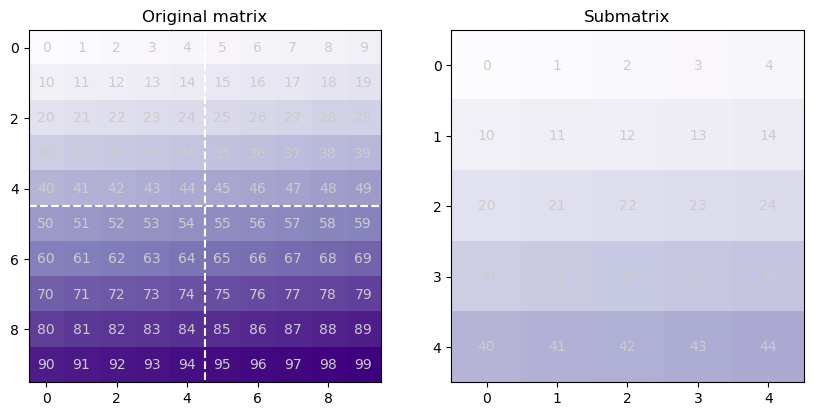

In [102]:
# 행렬 C 생성
C = np.arange(100).reshape((10,10))

# 처음 5개의 행, 5개의 열로 이루어진 하위 행렬 추출
C_1 = C[0:5:1,0:5:1]

print(C)
print(C_1)



# 행렬 시각화 부분
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='Purples',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(C_1,cmap='Purples',origin='upper',vmin=0,vmax=np.max(C))
axs[1].set_title('Submatrix')
# text labels
for (j,i),num in np.ndenumerate(C_1):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

plt.show()
     

연습문제 4-6

In [103]:
m = 4
n = 6
A = np.random.randn(m,n);
B = np.random.randn(n,m)

C1 = np.zeros((m,m))
for row in range(m):
  for col in range(m):
    C1[row,col] = np.dot( A[row,:],B[:,col] )
    


C2 = A@B
np.isclose( C1,C2 )     

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

연습문제 4-8

In [105]:
def isMatrixSymmetric(S):
  
  D = S-S.T

  sse = np.sum(D**2)

  return sse<10**-15

A = np.random.randn(4,4)
AtA = A.T@A

# test!
print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

False
True


연습문제 4-9

In [107]:
A = np.random.randn(4,4)
AtA = (A + A.T) / 2

print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

False
True


연습문제 4-12

In [108]:
N = 5
d1 = np.diag( np.random.randn(N) )
d2 = np.diag( np.random.randn(N) )

hadamard = d1*d2
standard = d1@d2

hadamard - standard

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])